In [1]:

# Author: Satyajeet Kumar
#Importing required libraries
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, fftfreq

%matplotlib inline
plt.style.use(['seaborn-deep'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (12,6),
    "font.size": 15})

In [174]:
#Function to plotting magnitude spectrum



def plot_mag_spec(data, samp_rate, type_of_instrument):
    import numpy as np
    import scipy as sp
    import matplotlib.pyplot as plt
    from scipy.io import wavfile
    from scipy.fft import fft, fftfreq
    N = data.size
    T = 1/samp_rate # Distance between two samples
    XF = fft(data)  # Finding fourier transform 
    f = fftfreq(N, T)[:N//2] # Finding frequencies
    plt.stem(f, 2.0/N * np.abs(XF[0:N//2]))
    plt.title(f'Magnitude spectrum of {type_of_instrument}')
    plt.xlabel("f")
    plt.ylabel("|X(f)|")
    plt.grid()
    plt.show()
    
def plot_mag_spec1(data, samp_rate, type_of_instrument):
    import numpy as np
    import scipy as sp
    import matplotlib.pyplot as plt
    from scipy.io import wavfile
    from scipy.fft import fft, fftfreq
    N = data.size
    T = 1/samp_rate # Distance between two samples
    XF = fft(data)  # Finding fourier transform 
    f = fftfreq(N, T)[:N//2] # Finding frequencies
    plt.stem(f,  np.abs(XF[0:N//2]))
    plt.title(f'Magnitude spectrum of {type_of_instrument}')
    plt.xlabel("f")
    plt.ylabel("|X(f)|")
    plt.grid()
    plt.show()
    
#Function to find fundamental frequency
def find_f0(data,samp_rate,thres,dis):
    from scipy.signal import find_peaks
    XF    = fft(data)
    k       = len(XF)
    peaks, _= find_peaks(abs(XF),threshold=thres,distance=dis)
    peaks   = peaks*samp_rate/k
    f0      = peaks[0]
    print(f'Fundamental frequency is {round(f0, 2)} Hz')
    return f0

#Function to plot magnitude spectrum on dB scale
def plot_mag_spec_dB(data, samp_rate, type_of_instrument):
    import numpy as np
    import scipy as sp
    import matplotlib.pyplot as plt
    from scipy.io import wavfile
    from scipy.fft import fft, fftfreq
    N = data.size
    T = 1/samp_rate # Distance between two samples
    XF = fft(data)  # Finding fourier transform 
    X = 2.0/N * np.abs(XF[0:N//2])
    f = fftfreq(N, T)[:N//2] # Finding frequencies
    plt.plot(f, 20*np.log10(X/max(X)))
    plt.title(f'Magnitude spectrum of {type_of_instrument} ')
    plt.xlabel("f")
    plt.ylabel("|X(f)|(in dB scale)")
    plt.grid()
    plt.show()

   
    
    
    


In [98]:
def plot_mag_spec_dB(data, samp_rate, type_of_instrument):
    import numpy as np
    import scipy as sp
    import matplotlib.pyplot as plt
    from scipy.io import wavfile
    from scipy.fft import fft, fftfreq
    N = data.size
    T = 1/samp_rate # Distance between two samples
    XF = fft(data)  # Finding fourier transform 
    X = 2.0/N * np.abs(XF[0:N//2])
    f = fftfreq(N, T)[:N//2] # Finding frequencies
    plt.stem(f, 20*np.log10(X/max(X)))
    plt.title(f'Magnitude spectrum of {type_of_instrument} sample')
    plt.xlabel("f")
    plt.ylabel("|X(f)|(in dB scale)")
    plt.grid()
    plt.show()


    


In [141]:
#Whistling Keylock
import art 
from art import *

# Function for Keylock
Fs_ref1, data_ref1 = wavfile.read('ref_whistle.wav')

#Finding fundamental frequency
def finding_f0(data,samp_rate,thres,dis):
    from scipy.signal import find_peaks
    XF    = fft(data)
    k       = len(XF)
    peaks, _= find_peaks(abs(XF),threshold=thres,distance=dis)
    peaks   = peaks*samp_rate/k
    f0      = peaks[0]
    return f0

f0_ref = finding_f0(data_ref1 ,Fs_ref1,  0.3*10**7 ,1)
print(f'Fundamental frequency of reference whistle is {round(f0_ref, 2)} Hz.')

# Function to compare frequencies
def keylock(Fs_check, data_check):
    
    f0_ref = finding_f0(data_ref1 ,Fs_ref1,  0.3*10**7 ,1)
    f0_check = finding_f0(data_check ,Fs_check,  0.3*10**7 ,1)
    f0_check = finding_f0(data_check ,Fs_check,  0.3*10**7 ,1)
    print(f'Fundamental frequency of this whistle is {round(f0_check, 2)} Hz.')
    if (f0_check > f0_ref*(1-0.05) and f0_check < f0_ref*(1+0.05)):
        tprint("ACCESS  GRANTED! ")
    else:
        tprint("ACCESS  DENIED!")
        
    return None
     
    

Fundamental frequency of reference whistle is 1878.31 Hz.


please whistle into the microphone
done - Input taken
Fundamental frequency of this whistle is 1943.26 Hz.
    _      ____   ____  _____  ____   ____      ____  ____      _     _   _  _____  _____  ____   _  
   / \    / ___| / ___|| ____|/ ___| / ___|    / ___||  _ \    / \   | \ | ||_   _|| ____||  _ \ | | 
  / _ \  | |    | |    |  _|  \___ \ \___ \   | |  _ | |_) |  / _ \  |  \| |  | |  |  _|  | | | || | 
 / ___ \ | |___ | |___ | |___  ___) | ___) |  | |_| ||  _ <  / ___ \ | |\  |  | |  | |___ | |_| ||_| 
/_/   \_\ \____| \____||_____||____/ |____/    \____||_| \_\/_/   \_\|_| \_|  |_|  |_____||____/ (_) 
                                                                                                     



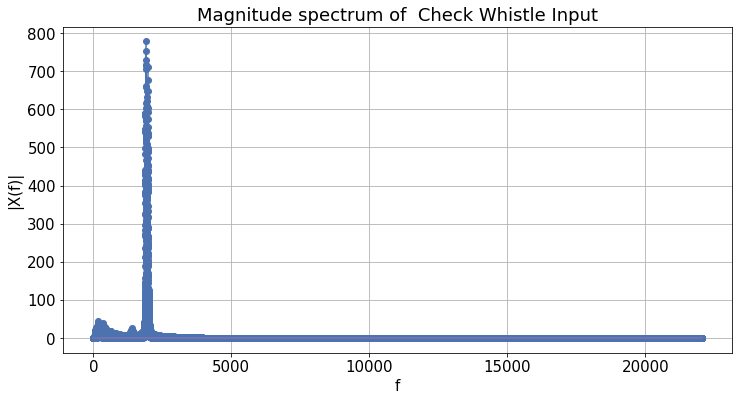

In [247]:
# Run this cell to record your whistle input and compare it with reference of Key-lock

from sys import byteorder
from array import array
from struct import pack

import pyaudio
import wave

THRESHOLD = 500
CHUNK_SIZE = 1024
FORMAT = pyaudio.paInt16
RATE = 44100

def is_silent(snd_data):
    "Returns 'True' if below the 'silent' threshold"
    return max(snd_data) < THRESHOLD

def normalize(snd_data):
    "Average the volume out"
    MAXIMUM = 16384
    times = float(MAXIMUM)/max(abs(i) for i in snd_data)
    r = array('h')
    for i in snd_data:
        r.append(int(i*times))
    return r
def trim(snd_data):
    "Trim the blank spots at the start and end"
    def _trim(snd_data):
        snd_started = False
        r = array('h')

        for i in snd_data:
            if not snd_started and abs(i)>THRESHOLD:
                snd_started = True
                r.append(i)

            elif snd_started:
                r.append(i)
        return r
    # Trim to the left
    snd_data = _trim(snd_data)

    # Trim to the right
    snd_data.reverse()
    snd_data = _trim(snd_data)
    snd_data.reverse()
    return snd_data
def add_silence(snd_data, seconds):
    "Add silence to the start and end of 'snd_data' of length 'seconds' (float)"
    silence = [0] * int(seconds * RATE)
    r = array('h', silence)
    r.extend(snd_data)
    r.extend(silence)
    return r
def record():
    """
    Record a word or words from the microphone and 
    return the data as an array of signed shorts.

    Normalizes the audio, trims silence from the 
    start and end, and pads with 0.5 seconds of 
    blank sound to make sure VLC et al can play 
    it without getting chopped off.
    """
    p = pyaudio.PyAudio()
    stream = p.open(format=FORMAT, channels=1, rate=RATE,
        input=True, output=True,
        frames_per_buffer=CHUNK_SIZE)
    num_silent = 0
    snd_started = False

    r = array('h')

    while 1:
        # little endian, signed short
        snd_data = array('h', stream.read(CHUNK_SIZE))
        if byteorder == 'big':
            snd_data.byteswap()
        r.extend(snd_data)

        silent = is_silent(snd_data)

        if silent and snd_started:
            num_silent += 1
        elif not silent and not snd_started:
            snd_started = True

        if snd_started and num_silent > 30:
            break
    sample_width = p.get_sample_size(FORMAT)
    stream.stop_stream()
    stream.close()
    p.terminate()

    r = normalize(r)
    r = trim(r)
    r = add_silence(r, 0.5)
    return sample_width, r
def record_to_file(path):
    "Records from the microphone and outputs the resulting data to 'path'"
    sample_width, data = record()
    data = pack('<' + ('h'*len(data)), *data)

    wf = wave.open(path, 'wb')
    wf.setnchannels(1)
    wf.setsampwidth(sample_width)
    wf.setframerate(RATE)
    wf.writeframes(data)
    wf.close()

if __name__ == '__main__':
    print("please whistle into the microphone")
    record_to_file('check_whistle.wav')
    print("done - Input taken")
    
Fs_check, data_check= wavfile.read('check_whistle.wav') 
keylock(Fs_check, data_check)
plot_mag_spec(data_check1, Fs_check1, " Check Whistle Input")

In [144]:
# Checking data1
Fs_check, data_check = wavfile.read('whistlecheck1.wav') 
keylock(Fs_check, data_check)

Fundamental frequency of this whistle is 1878.31 Hz.
    _      ____   ____  _____  ____   ____      ____  ____      _     _   _  _____  _____  ____   _  
   / \    / ___| / ___|| ____|/ ___| / ___|    / ___||  _ \    / \   | \ | ||_   _|| ____||  _ \ | | 
  / _ \  | |    | |    |  _|  \___ \ \___ \   | |  _ | |_) |  / _ \  |  \| |  | |  |  _|  | | | || | 
 / ___ \ | |___ | |___ | |___  ___) | ___) |  | |_| ||  _ <  / ___ \ | |\  |  | |  | |___ | |_| ||_| 
/_/   \_\ \____| \____||_____||____/ |____/    \____||_| \_\/_/   \_\|_| \_|  |_|  |_____||____/ (_) 
                                                                                                     



In [146]:
# Checking data2 Manually
Fs_check, data_check= wavfile.read('whistlecheck2.wav') 
keylock(Fs_check, data_check)

Fundamental frequency of this whistle is 1399.68 Hz.
    _      ____   ____  _____  ____   ____     ____   _____  _   _  ___  _____  ____   _ 
   / \    / ___| / ___|| ____|/ ___| / ___|   |  _ \ | ____|| \ | ||_ _|| ____||  _ \ | |
  / _ \  | |    | |    |  _|  \___ \ \___ \   | | | ||  _|  |  \| | | | |  _|  | | | || |
 / ___ \ | |___ | |___ | |___  ___) | ___) |  | |_| || |___ | |\  | | | | |___ | |_| ||_|
/_/   \_\ \____| \____||_____||____/ |____/   |____/ |_____||_| \_||___||_____||____/ (_)
                                                                                         



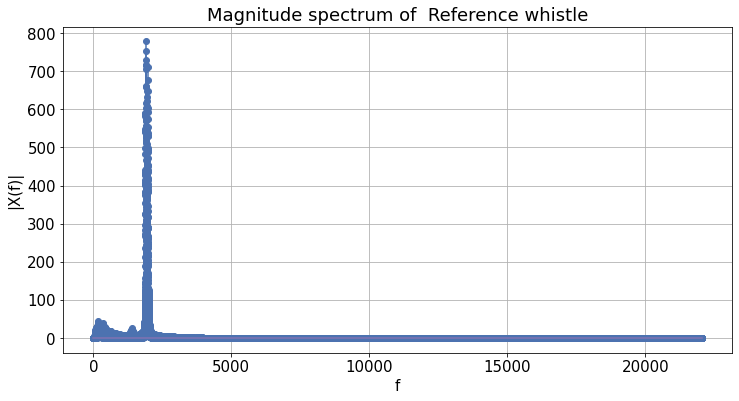

In [105]:
#Plotting magnitude spectrum of reference whistle
plot_mag_spec(data_ref1, Fs_ref1, " Reference whistle")

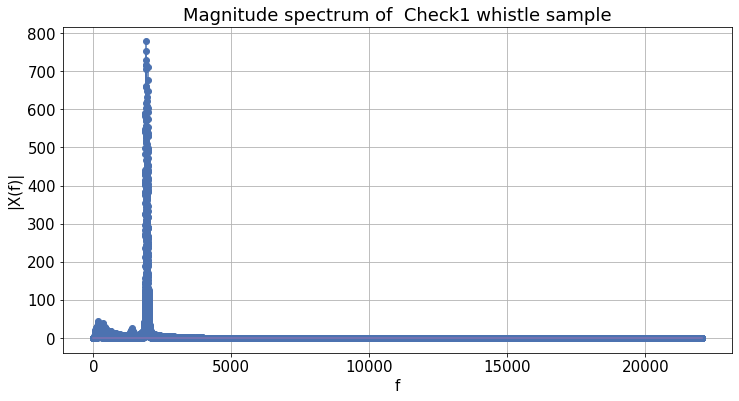

In [106]:
#Plotting magnitude spectrum of check1 whistle
plot_mag_spec(data_check1, Fs_check1, " Check1 whistle sample")


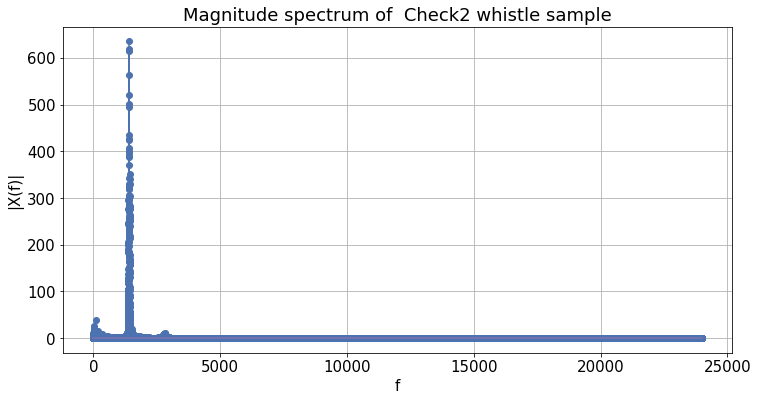

In [211]:
##Plotting magnitude spectrum of check2 whistle
plot_mag_spec(data_check2, Fs_check2, " Check2 whistle sample")